In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
data=pd.read_csv("../Data/german.data",sep="\s+",header=None,names=["Status","Duration","Credit history","Purpose","Credit amount","Savings account/bonds",
"Present employment since","Installment rate","Personal status and sex","Other debtors / guarantors","Present residence since",
"Property","Age in years","Other installment plans","Housing","Number of existing credits","Job","Number of people being liable to provide maintenance for","Telephone","Foreign worker","RESULT"])

In [3]:
pd.set_option('display.max_columns', 500)
data.head()

,Status,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,RESULT
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


## Analyse descriptive

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Status                                                      1000 non-null object
Duration                                                    1000 non-null int64
Credit history                                              1000 non-null object
Purpose                                                     1000 non-null object
Credit amount                                               1000 non-null int64
Savings account/bonds                                       1000 non-null object
Present employment since                                    1000 non-null object
Installment rate                                            1000 non-null int64
Personal status and sex                                     1000 non-null object
Other debtors / guarantors                                  1000 non-null object
Present residence since                                     1000 non-null int64
Propert

- Dans ce jeu de données  on a 1000 clients et 21 variables dont 13 qualitatives et 8 variables quantitatives.

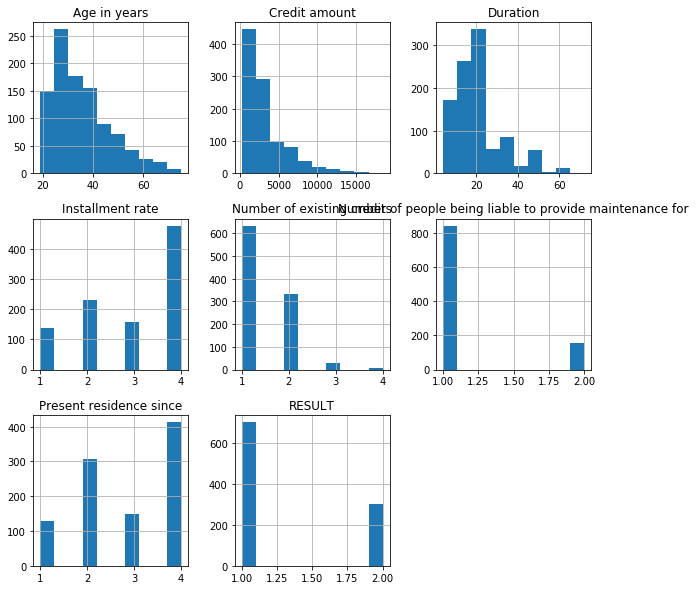

In [5]:
data.hist(figsize=(10,10));

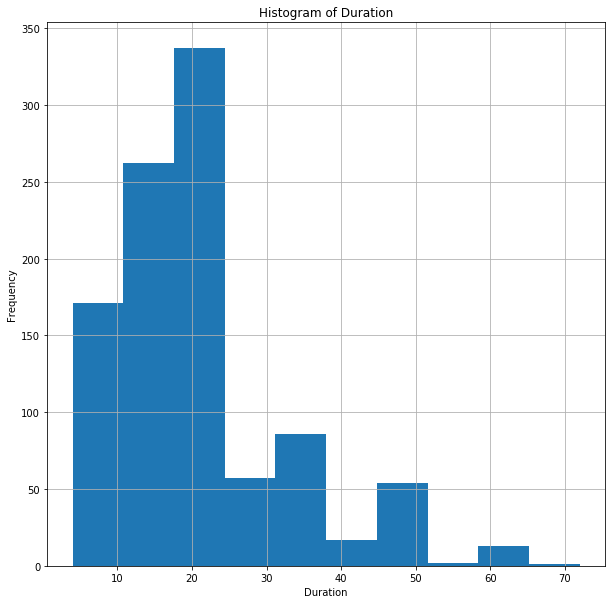

In [6]:
data.Duration.hist(figsize=(10,10))
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.savefig('hist_DurationN')

- La plupart des clients de cette banque  demandent un prêt sur une dureé entre 18 et 24 mois

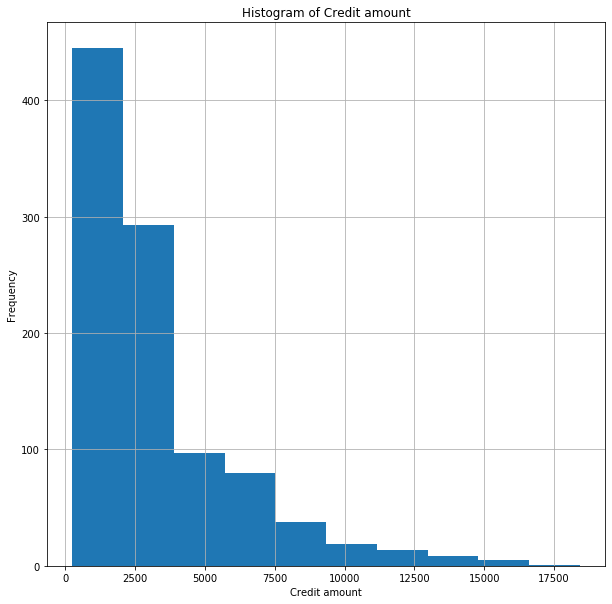

In [7]:
data["Credit amount"].hist(figsize=(10,10))
plt.title('Histogram of Credit amount')
plt.xlabel('Credit amount')
plt.ylabel('Frequency')
plt.savefig('hist_Credit amount')

- La plupart des clients de cette banque demandent un montant du crédit entre 200 DM et 2200 DM 

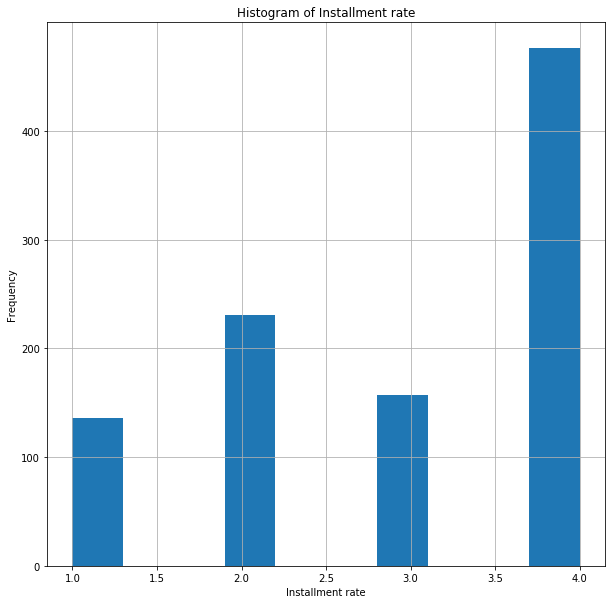

In [8]:
data["Installment rate"].hist(figsize=(10,10))
plt.title('Histogram of Installment rate')
plt.xlabel('Installment rate')
plt.ylabel('Frequency')
plt.savefig('hist_Installment rate')

- La plupart des clients de cette banque dans ce dataset ont un taux de versement entre 3.7 et 4

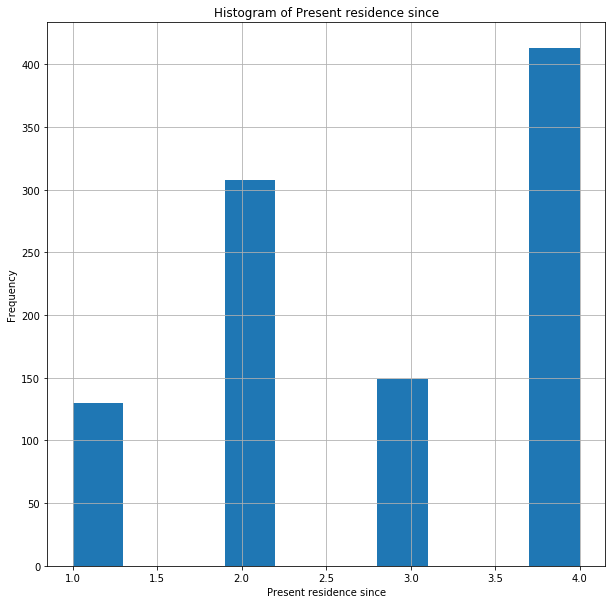

In [9]:
data["Present residence since"].hist(figsize=(10,10))
plt.title('Histogram of Present residence since')
plt.xlabel('Present residence since')
plt.ylabel('Frequency')
plt.savefig('hist_Present residence since')

- La plupart des clients de cette banque dans ce dataset sont des Résidents actuelles depuis 3.7 et 4 ans 


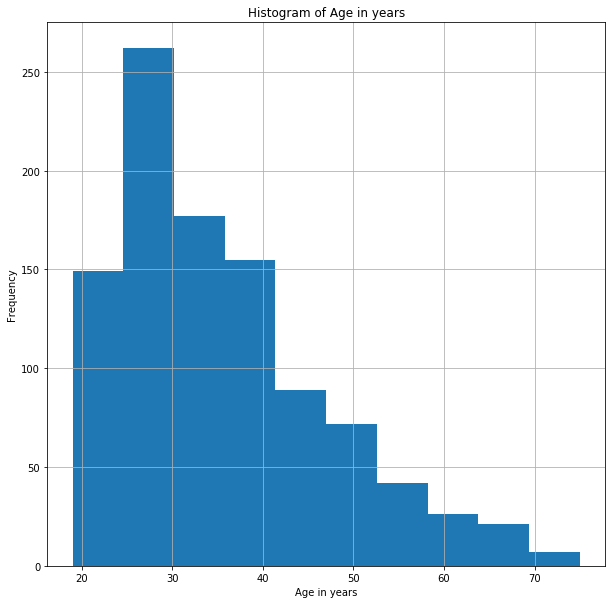

In [10]:
data["Age in years"].hist(figsize=(10,10))
plt.title('Histogram of Age in years')
plt.xlabel('Age in years')
plt.ylabel('Frequency')
plt.savefig('hist_Present Age in years')

- La plupart des clients de cette banque dans ce dataset sont agés entre 25 et 30 ans 

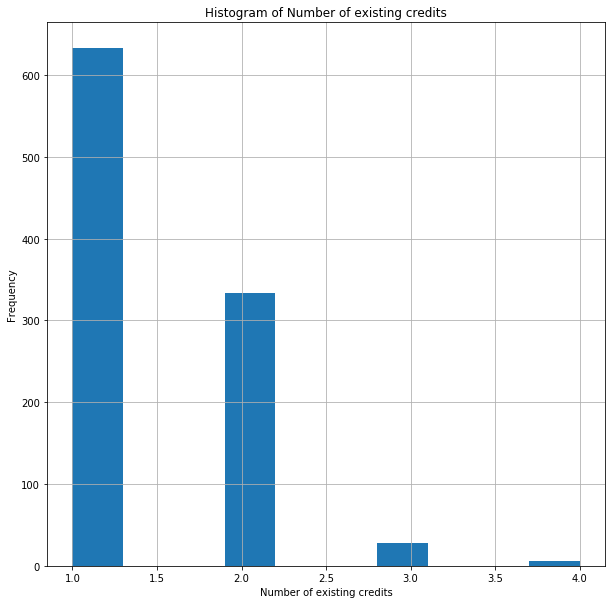

In [11]:
data["Number of existing credits"].hist(figsize=(10,10))
plt.title('Histogram of Number of existing credits')
plt.xlabel('Number of existing credits')
plt.ylabel('Frequency')
plt.savefig('hist_Number of existing credits')

- La plupart des clients de cette banque dans ce dataset ont un seul crédit (existant déja)

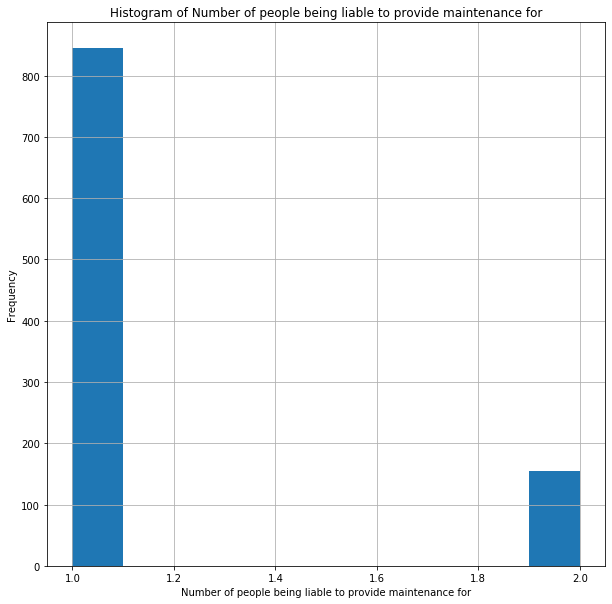

In [12]:
data["Number of people being liable to provide maintenance for"].hist(figsize=(10,10))
plt.title('Histogram of Number of people being liable to provide maintenance for')
plt.xlabel('Number of people being liable to provide maintenance for')
plt.ylabel('Frequency')
plt.savefig('hist_Number of people being liable to provide maintenance for')

- La plupart des clients de cette banque dans ce dataset ont un nombre des personnes responsables pour assurer la maintenance egale & 1

### Analyse des valeurs aberrantes:

In [13]:
import seaborn as sns

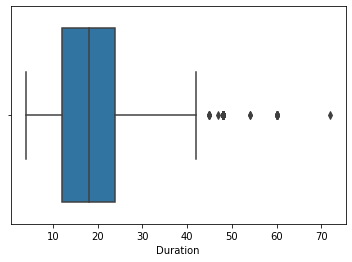

In [14]:
outliers=[]
sns.boxplot(x=data['Duration'])

In [15]:
dfw = data['Duration']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [16]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)

In [17]:
len(outliers[0])

70

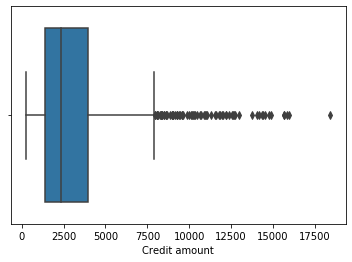

In [18]:
sns.boxplot(x=data['Credit amount'])

In [19]:
dfw = data['Credit amount']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)

In [20]:
len(outliers[1])

72

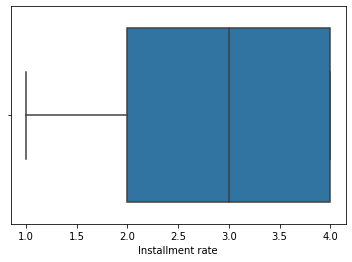

In [21]:
sns.boxplot(x=data['Installment rate'])

In [22]:
dfw = data['Installment rate']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)

In [23]:
len(outliers[2])

0

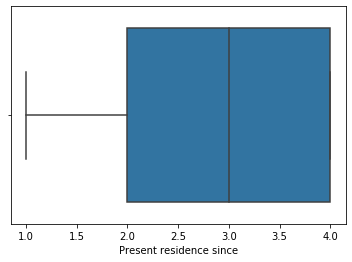

In [24]:
sns.boxplot(x=data['Present residence since'])

In [25]:
dfw = data['Present residence since']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)

In [26]:
len(outliers[3])

0

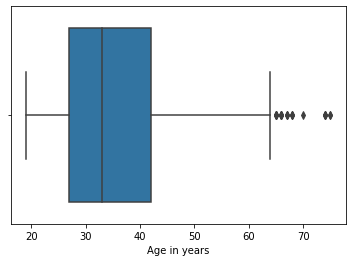

In [27]:
sns.boxplot(x=data['Age in years'])

In [28]:
dfw = data['Age in years']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)

In [29]:
outliers[4]

Int64Index([  0,  75, 137, 163, 179, 186, 187, 213, 330, 430, 438, 536, 554,
            606, 624, 723, 756, 774, 779, 807, 846, 883, 917],
           dtype='int64')

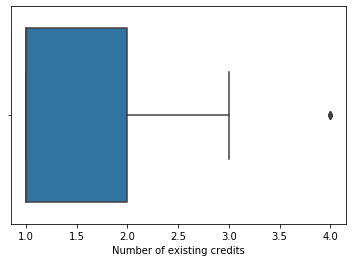

In [30]:
sns.boxplot(x=data['Number of existing credits'])

In [31]:
dfw = data['Number of existing credits']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)

In [32]:
len(outliers[5])

6

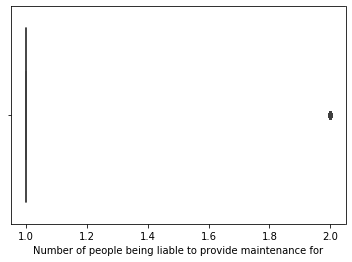

In [33]:
sns.boxplot(x=data["Number of people being liable to provide maintenance for"])

In [34]:
dfw = data["Number of people being liable to provide maintenance for"]
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)

In [35]:
len(outliers[6])

155

for i in range(0,7):
    data=data.drop(outliers[i], errors='ignore')

- En supprimant les valeurs aberrantes le nombre des clients a diminué de 1000 à 728 

- Dans la suite je ne vais pas supprimer les valeurs abérrantes car ceçi va faire diminuer les scores des algorithmes 

data.shape

## **I) Features Engineering**

### Encoding dummy variables

In [36]:
dummies=["Status","Credit history","Purpose","Savings account/bonds","Present employment since","Personal status and sex",
"Other debtors / guarantors","Property","Other installment plans","Housing","Job"]

In [37]:
data_dummied = pd.get_dummies(data, columns=dummies,drop_first=True)

In [38]:
data_dummied['Telephone'] = data_dummied['Telephone'].map( {'A191': 0, 'A192': 1} ).astype(int)
data_dummied['Foreign worker'] = data_dummied['Foreign worker'].map( {'A201': 1, 'A202': 0} ).astype(int)

In [39]:
data_dummied.head()
#data_dummied.shape


,Duration,Credit amount,Installment rate,Present residence since,Age in years,Number of existing credits,Number of people being liable to provide maintenance for,Telephone,Foreign worker,RESULT,Status_A12,Status_A13,Status_A14,Credit history_A31,Credit history_A32,Credit history_A33,Credit history_A34,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings account/bonds_A62,Savings account/bonds_A63,Savings account/bonds_A64,Savings account/bonds_A65,Present employment since_A72,Present employment since_A73,Present employment since_A74,Present employment since_A75,Personal status and sex_A92,Personal status and sex_A93,Personal status and sex_A94,Other debtors / guarantors_A102,Other debtors / guarantors_A103,Property_A122,Property_A123,Property_A124,Other installment plans_A142,Other installment plans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0
3,42,7882,2,4,45,1,2,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [40]:
X= data_dummied.iloc[:,data_dummied.columns != 'RESULT'].values
y= pd.factorize(data_dummied['RESULT'])[0]
data_dummied2=data_dummied.drop(columns=["Housing_A153","RESULT"])
data_dummied2.head()
data_dummied2['target']=y
data_dummied2.head();

## **II) Features Selection**

### 1)Checking for correlated colums

In [41]:
# Convert feature matrix into DataFrame
df=pd.DataFrame(X)
# View the data frame
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,6,1169,4,4,67,2,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [42]:
X.shape[1]

48

In [43]:
from scipy.stats import pearsonr
L=[]
L2=[]
L3=[]
L4=[]
for i in range(X.shape[1]-1):
    for j in range(i+1,X.shape[1]):
        corr, p_value = pearsonr(X[:,i],X[:,j])
        L.append(corr)
        L2.append(p_value)
        L3.append(i)
        L4.append(j)
for i in range(len(L)):
    if L[i]>0.70:
        print("corr entre la colonne ",L3[i]," et ",L4[i]," corr=",L[i]," p_value=",L2[i])

corr entre la colonne  40  et  44  corr= 0.7798526409663612  p_value= 2.921730603538456e-205


In [44]:
# Drop feature #44 = Housing_A153
df.drop([44], axis=1, inplace=True)
#NEW X 
X= df.iloc[:,:].values

In [45]:
X.shape

(1000, 47)

- On a détecté que les deux variables 40 et 44 sont corrélés on a donc supprimé la colonne 44

## **III) Dimensionality Reduction**

### ACP

In [46]:
#Variables quanti afin de réaliser une ACP 
Quanti=data_dummied.iloc[:,0:7]
Quanti=pd.DataFrame(Quanti)
Quanti.head()

,Duration,Credit amount,Installment rate,Present residence since,Age in years,Number of existing credits,Number of people being liable to provide maintenance for
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


In [47]:
# Rescaling avec Standardscaler (valeur moyenne et écart-type)
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

Quanti=pd.DataFrame(StandardScaler.fit_transform(Quanti.values),columns=Quanti.columns)

In [48]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = decomposition.PCA()
Data_Pca = pca.fit_transform(Quanti)
pca.explained_variance_ratio_

array([0.23697183, 0.20179308, 0.15974033, 0.1341607 , 0.12402952,
       0.1029517 , 0.04035283])

In [49]:
pca.explained_variance_ratio_.sum()

1.0

In [50]:
print(pca.n_components_)

7


In [51]:
var = pca.explained_variance_
var

array([1.66046326, 1.41396555, 1.11930163, 0.94006493, 0.86907573,
       0.72138331, 0.28275259])

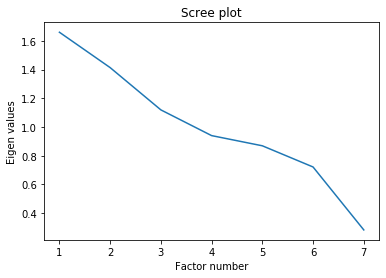

In [52]:
p = Quanti.shape[1]

plt.plot(np.arange(1,p+1),var)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

- Selon le critére de Coud, on retient 3 dimensions

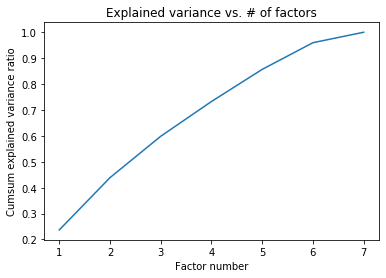

In [53]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


In [54]:
print(pd.DataFrame({'Val.Propre':var}))

   Val.Propre
0    1.660463
1    1.413966
2    1.119302
3    0.940065
4    0.869076
5    0.721383
6    0.282753


- On remarque que l'on a 3 composantes principales (d'après le critère de kaiser)

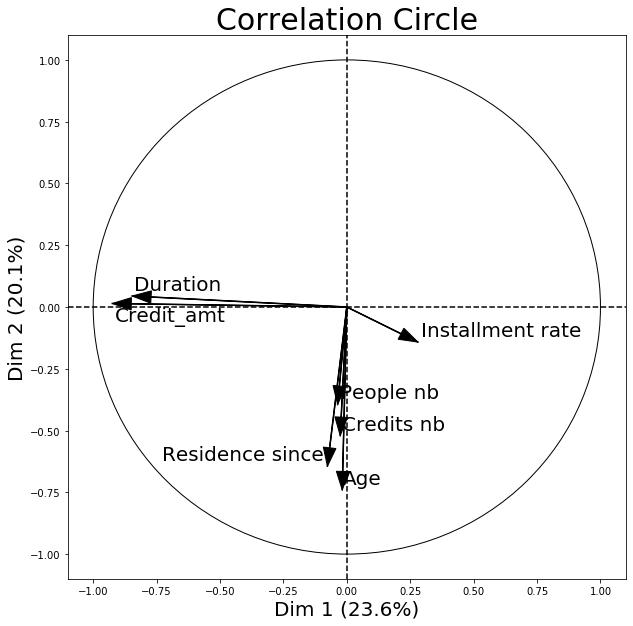

In [57]:
from mlxtend.plotting import plot_pca_correlation_graph
feature_names=['Duration','Credit_amt','Installment rate','Residence since','Age','Credits nb','People nb']
figure, correlation_matrix = plot_pca_correlation_graph(Quanti, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)


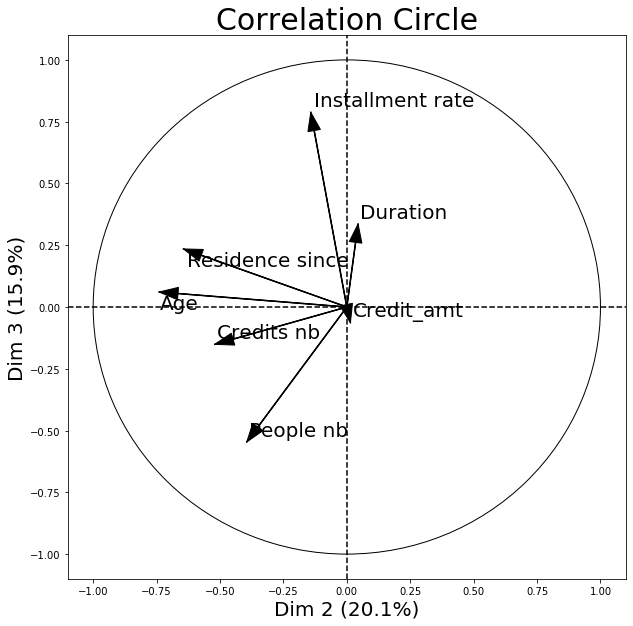

In [58]:
from mlxtend.plotting import plot_pca_correlation_graph
feature_names=['Duration','Credit_amt','Installment rate','Residence since','Age','Credits nb','People nb']
figure, correlation_matrix2 = plot_pca_correlation_graph(Quanti, 
                                                        feature_names,
                                                        dimensions=(2,3),
                                                        figure_axis_size=10)


In [59]:
principalDf = pd.DataFrame(Data_Pca[:,0:3]
             , columns = ['principal component 1', 
                          'principal component 2',
                         'principal component 3'])

In [60]:
principalDf

,principal component 1,principal component 2,principal component 3
0,-1.438189,2.763643,-0.802303
1,2.260842,-1.807829,-0.092291
2,-0.518687,1.208221,1.864906
3,2.638944,1.363089,1.015996
4,0.740745,2.735646,0.966980
5,2.597898,0.828829,1.249621
6,0.110081,1.068031,-0.751702
7,1.876095,-1.062577,0.179742
8,-0.282761,1.435684,0.195508
9,0.749443,-0.447633,-0.748739


In [61]:
correlation_matrix

,Dim 1,Dim 2
Duration,-0.846646,0.044398
Credit_amt,-0.924730,0.014166
Installment rate,0.280511,-0.142082
Residence since,-0.076570,-0.644354
Age,-0.018037,-0.740382
Credits nb,-0.026002,-0.520698
People nb,-0.036271,-0.394599


In [62]:
correlation_matrix2

,Dim 1,Dim 2,Dim 3
Duration,-0.846646,0.044398,0.336011
Credit_amt,-0.924730,0.014166,-0.063574
Installment rate,0.280511,-0.142082,0.787971
Residence since,-0.076570,-0.644354,0.235019
Age,-0.018037,-0.740382,0.060650
Credits nb,-0.026002,-0.520698,-0.151045
People nb,-0.036271,-0.394599,-0.546454


- Duration et credit_amt sont très negativement correlées avec la 1ere dim 
- Age est negativement corrélée avec la 2eme dimension
- Installment rate est correlée avec la 3eme dim


## **IV) Model creation**

### **Non supervised learning algorithms**

### 1)KMEANS ( méthode de partitionnement) :

In [57]:
SansLabels=data_dummied.drop(columns=(['RESULT']));
#Labels
Labels=y

In [58]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier



res=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(SansLabels)
    res.append(kmeans.inertia_)

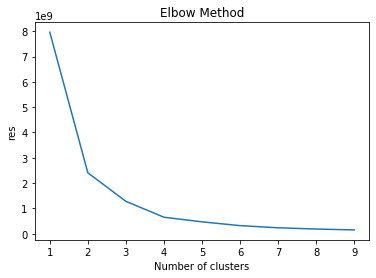

In [59]:
plt.plot(range(1, 10), res)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("res")
plt.show()

- En utilisant la  méthode "Elbow"==>Le nombre de cluster est égal  à 2

In [60]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(SansLabels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
from sklearn import metrics
metrics.adjusted_rand_score(Labels,kmeans.labels_)

0.05160461123028216

### Interprétation:
- le score du tableau croisé est trés faible, Donc On ne va pas  pouvoir l'utiliser pour  interpréter la variable Cible "BAD" avec les clusters
- ==> on va se contenter d'utliser le profiling des variables synthétiques

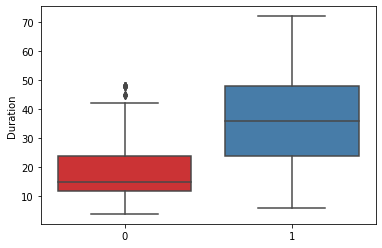

In [62]:
sns.boxplot(x=kmeans.labels_, y="Duration", data=data, palette="Set1");

- Interprétation :
  - la variable "Duration " est significative , car dans le cluster0 sa valeur est entre 12  et 24 et dans le cluster1 , sa valeur est entre 27 et 48

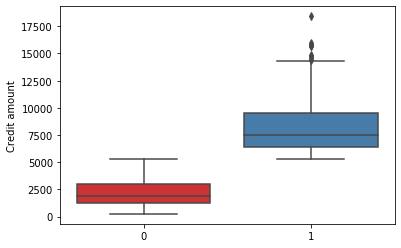

In [63]:
sns.boxplot(x=kmeans.labels_, y="Credit amount", data=data, palette="Set1");

- Interprétation :
  - la variable "Credit amount " est significative , car dans le cluster0 sa valeur est entre 1250 et 3000 et dans le cluster1 , sa valeur est entre 6500 et 9000

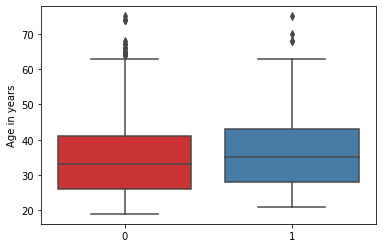

In [64]:
sns.boxplot(x=kmeans.labels_, y="Age in years", data=data, palette="Set1");

- La variable "Age in years" n'est pas du tout significative car on a les memes valeurs dans les deux clusters

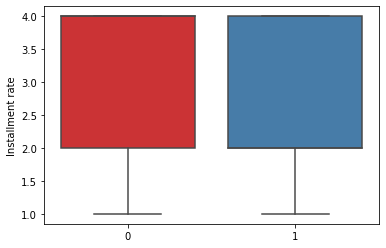

In [65]:
sns.boxplot(x=kmeans.labels_, y="Installment rate", data=data, palette="Set1");

- Interprétation : la variable "Installment rate" n'est pas du tout significative ( car les deux clusters contiennent les memes valeurs )

##### Conclusion :
  - Dans Ce jeux de données , seulement les variables "Credit amount" et "Duration" sont significatives et elles sont plus élevées au niveau su cluster1 que le cluster0

### 2)CAH (méthode hiérarchique):

In [66]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

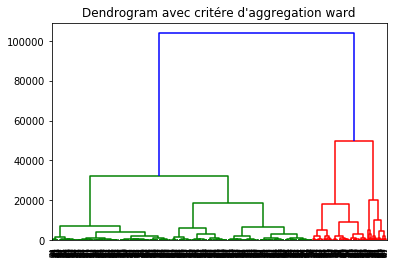

In [67]:
Z = linkage(SansLabels,method='ward',metric='euclidean')
plt.title("Dendrogram avec critére d'aggregation ward") 
dendrogram(Z) 
plt.show()

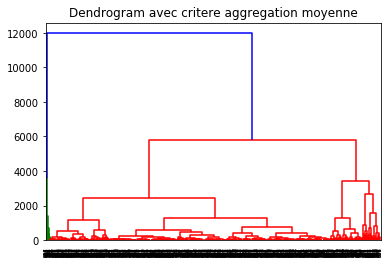

In [68]:
matriceA= linkage(SansLabels, 'average')
dendrogram(matriceA)
plt.title('Dendrogram avec critere aggregation moyenne')
plt.show()

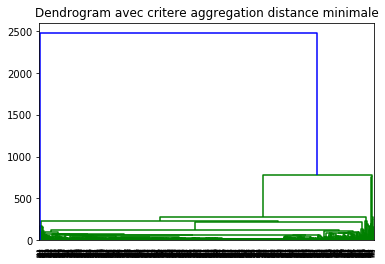

In [69]:
matriceS = linkage(SansLabels, 'single')
dendrogram(matriceS)
plt.title('Dendrogram avec critere aggregation distance minimale')
plt.show()

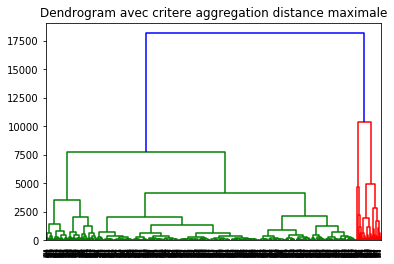

In [70]:
matrice=linkage(SansLabels, 'complete')
dendrogram(matrice)
plt.title('Dendrogram avec critere aggregation distance maximale')
plt.show()

- Aprés avoir essayer d'appliquer les 4 méthodes , On a remarqué d'aprés les dendrogrammes que la méthode Ward est la meilleure ,  donc c'est elle qu'on va utiliser pour la suite

In [71]:
groupes_cah = fcluster(Z,t=60000,criterion='distance')

In [73]:
pd.crosstab(Labels,groupes_cah)

col_0,1,2
row_0,,
0,570,130
1,209,91


In [74]:
metrics.adjusted_rand_score(Labels,groupes_cah)

0.056114757494858475

### Interprétation:
- De meme, le score du tableau croisé est trés faible, Donc On ne va pas  pouvoir l'utiliser pour  interpréter la variable Cible "RESULT" avec les clusters
- ==> on va se contenter d'utliser le profiling des variables synthétiques comme on a fait au niveau du KMEANS

### **Supervised learning algorithms**

In [75]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1)Trying KNN

In [78]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state  =0)

Text(0, 0.5, 'Erreur')

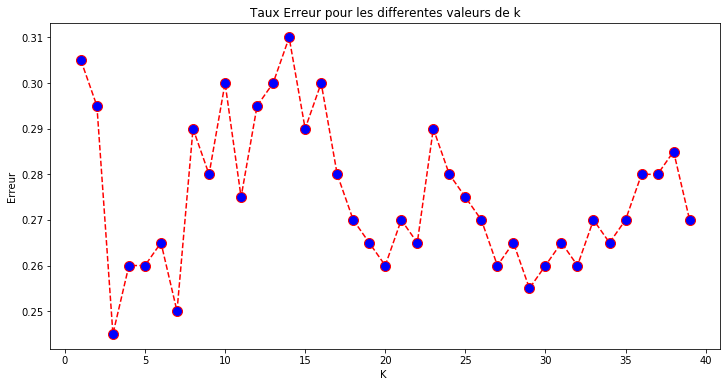

In [79]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

- L'erreur est minimal lorsque le nombre de K est égale à 4

In [81]:
knn = KNeighborsClassifier(4)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [82]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.74


- On a appliqué la cross validation:

In [83]:
scoring = 'accuracy'
score = cross_val_score(knn, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76 0.62 0.68 0.67 0.7  0.68 0.6  0.74 0.67 0.63]


In [84]:
(np.mean(score))

0.6749999999999999

In [85]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[131   7]
 [ 45  17]]


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       138
           1       0.71      0.27      0.40        62

    accuracy                           0.74       200
   macro avg       0.73      0.61      0.61       200
weighted avg       0.73      0.74      0.70       200



### 2)Trying Decision tree

In [87]:
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [88]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc_model.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc_model.score(X_test, y_test)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.71


In [89]:
scoring = 'accuracy'
score = cross_val_score(dtc, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.63 0.65 0.66 0.72 0.67 0.7  0.67 0.71 0.66 0.73]


In [90]:
np.mean(score)

0.68

In [91]:
print(confusion_matrix(y_test, y_pred_dtc))

[[114  24]
 [ 34  28]]


In [92]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       138
           1       0.54      0.45      0.49        62

    accuracy                           0.71       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.70      0.71      0.70       200



### 3)Trying RFC 

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

In [94]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc_model.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc_model.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.77


In [95]:
scoring = 'accuracy'
score = cross_val_score(rfc, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76 0.7  0.81 0.68 0.77 0.76 0.75 0.77 0.77 0.73]


In [96]:
np.mean(score)

0.75

In [97]:
print(confusion_matrix(y_test, y_pred_rfc))

[[130   8]
 [ 39  23]]


In [98]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       138
           1       0.74      0.37      0.49        62

    accuracy                           0.77       200
   macro avg       0.76      0.66      0.67       200
weighted avg       0.76      0.77      0.74       200



### 4.1) Simple gradient boosting classifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=None, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.703
Accuracy score (validation): 0.690
Learning rate:  0.075
Accuracy score (training): 0.708
Accuracy score (validation): 0.700
Learning rate:  0.1
Accuracy score (training): 0.731
Accuracy score (validation): 0.735
Learning rate:  0.25
Accuracy score (training): 0.799
Accuracy score (validation): 0.740
Learning rate:  0.5
Accuracy score (training): 0.825
Accuracy score (validation): 0.760
Learning rate:  0.75
Accuracy score (training): 0.849
Accuracy score (validation): 0.715
Learning rate:  1
Accuracy score (training): 0.856
Accuracy score (validation): 0.755


We're mainly interested in the classifier's accuracy on the validation set, but it looks like a learning rate of 0.5 gives us the best performance on the validation set and good performance on the training set.

In [101]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=None, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
y_pred_GB = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_GB))
print("Classification Report")
print(classification_report(y_test, y_pred_GB))

Confusion Matrix:
[[119  19]
 [ 29  33]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       138
           1       0.63      0.53      0.58        62

    accuracy                           0.76       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.75      0.76      0.75       200



In [102]:
scoring = 'accuracy'
score = cross_val_score(gb_clf2, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)
print(np.mean(score))

[0.8  0.73 0.82 0.72 0.79 0.72 0.75 0.78 0.64 0.7 ]
0.745


### 4.2) XGBoost Classifier

In [104]:
from xgboost import XGBClassifier

In [105]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_XGB = xgb_clf.predict(X_test)

In [106]:
print("Accuracy score (training): {0:.3f}".format(xgb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(xgb_clf.score(X_test, y_test)))

Accuracy score (training): 0.880
Accuracy score (validation): 0.745


In [107]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_XGB))
print("Classification Report")
print(classification_report(y_test, y_pred_XGB))

Confusion Matrix:
[[122  16]
 [ 35  27]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       138
           1       0.63      0.44      0.51        62

    accuracy                           0.74       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.74      0.73       200



In [108]:
scoring = 'accuracy'
score = cross_val_score(xgb_clf, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)
print(np.mean(score))

[0.81 0.73 0.83 0.7  0.74 0.77 0.71 0.76 0.73 0.7 ]
0.748


### 5) Logistic regression

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_pred_logreg = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.781
Accuracy of logistic regression classifier on test set: 0.760


In [118]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report")
print(classification_report(y_test, y_pred_logreg))

Confusion Matrix:
[[119  19]
 [ 29  33]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       138
           1       0.63      0.53      0.58        62

    accuracy                           0.76       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.75      0.76      0.75       200



In [121]:
scoring = 'accuracy'
score = cross_val_score(logreg, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)
print(np.mean(score))

C:\Users\LEGION\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\LEGION\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

[0.79 0.7  0.77 0.71 0.67 0.77 0.74 0.73 0.73 0.76]
0.7369999999999999


C:\Users\LEGION\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\LEGION\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

### 6) Naive bayes -- GaussianNB model

In [122]:
from sklearn.naive_bayes import GaussianNB


In [123]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [124]:
y_pred_NB = model.predict(X_test)

In [125]:
print('Accuracy on train set: {:.3f}'.format(model.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy on train set: 0.731
Accuracy on test set: 0.740


In [126]:
print(metrics.classification_report(y_test, y_pred_NB))
print(metrics.confusion_matrix(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       138
           1       0.57      0.68      0.62        62

    accuracy                           0.74       200
   macro avg       0.70      0.72      0.71       200
weighted avg       0.76      0.74      0.75       200

[[106  32]
 [ 20  42]]


In [127]:
scoring = 'accuracy'
score = cross_val_score(model, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)
print(np.mean(score))

[0.74 0.6  0.77 0.67 0.76 0.7  0.69 0.69 0.75 0.69]
0.7059999999999998


### 7.1) Linear SVM

In [1]:
from sklearn.svm import SVC
svclassifier1 = SVC(kernel='linear')
svclassifier1.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred_LSVM = svclassifier1.predict(X_test)

In [130]:
print('Accuracy on train set: {:.3f}'.format(svclassifier1.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(svclassifier1.score(X_test, y_test)))

Accuracy on train set: 0.782
Accuracy on test set: 0.775


In [131]:
print(metrics.classification_report(y_test, y_pred_LSVM))
print(metrics.confusion_matrix(y_test, y_pred_LSVM))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       138
           1       0.67      0.53      0.59        62

    accuracy                           0.78       200
   macro avg       0.74      0.71      0.72       200
weighted avg       0.77      0.78      0.77       200

[[122  16]
 [ 29  33]]


### 7.2) SVM polinomial kernel

In [132]:
svclassifier2 = SVC(kernel='poly', degree=8)
svclassifier2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [133]:
y_pred_PSVM = svclassifier2.predict(X_test)
set(y_test) - set(y_pred_PSVM)

{1}

In [134]:
print('Accuracy on train set: {:.3f}'.format(svclassifier2.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(svclassifier2.score(X_test, y_test)))

Accuracy on train set: 0.833
Accuracy on test set: 0.690


In [135]:
print(metrics.classification_report(y_test, y_pred_PSVM))
print(metrics.confusion_matrix(y_test, y_pred_PSVM))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       138
           1       0.00      0.00      0.00        62

    accuracy                           0.69       200
   macro avg       0.34      0.50      0.41       200
weighted avg       0.48      0.69      0.56       200

[[138   0]
 [ 62   0]]


C:\Users\LEGION\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 7.3) SVM gaussian kernal

In [136]:
svclassifier3 = SVC(kernel='rbf')
svclassifier3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [137]:
y_pred_GSVM = svclassifier3.predict(X_test)

In [138]:
print('Accuracy on train set: {:.3f}'.format(svclassifier3.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(svclassifier3.score(X_test, y_test)))

Accuracy on train set: 0.891
Accuracy on test set: 0.785


In [139]:
print(metrics.classification_report(y_test, y_pred_GSVM ))
print(metrics.confusion_matrix(y_test, y_pred_GSVM ))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       138
           1       0.81      0.40      0.54        62

    accuracy                           0.79       200
   macro avg       0.79      0.68      0.70       200
weighted avg       0.79      0.79      0.76       200

[[132   6]
 [ 37  25]]


### 7.4) SVM sigmoid kernel

In [140]:
svclassifier4 = SVC(kernel='sigmoid')
svclassifier4.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [141]:
y_pred_SSVM = svclassifier4.predict(X_test)


In [142]:
print('Accuracy on train set: {:.3f}'.format(svclassifier4.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(svclassifier4.score(X_test, y_test)))

Accuracy on train set: 0.724
Accuracy on test set: 0.790


In [143]:
print(confusion_matrix(y_test, y_pred_SSVM))
print(classification_report(y_test, y_pred_SSVM))

[[127  11]
 [ 31  31]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       138
           1       0.74      0.50      0.60        62

    accuracy                           0.79       200
   macro avg       0.77      0.71      0.73       200
weighted avg       0.78      0.79      0.78       200



### Courbe ROC

In [144]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

from sklearn.metrics import roc_curve, auc

In [145]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_GB)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_XGB)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, y_pred_logreg)
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(y_test, y_pred_NB)
roc_auc7 = auc(fpr7, tpr7)
fpr8, tpr8, threshold8 = roc_curve(y_test, y_pred_LSVM)
roc_auc8 = auc(fpr8, tpr8)
fpr9, tpr9, threshold9 = roc_curve(y_test, y_pred_PSVM)
roc_auc9 = auc(fpr9, tpr9)
fpr10, tpr10, threshold10 = roc_curve(y_test, y_pred_GSVM)
roc_auc10 = auc(fpr10, tpr10)
fpr11, tpr11, threshold11 = roc_curve(y_test, y_pred_SSVM)
roc_auc11 = auc(fpr11, tpr11)

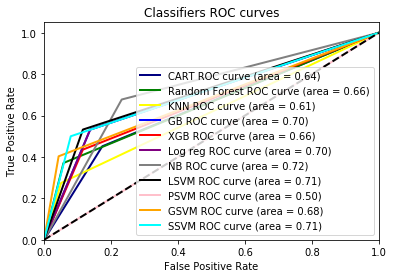

In [146]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='KNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='blue', lw=2, label='GB ROC curve (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='red', lw=2, label='XGB ROC curve (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='purple', lw=2, label='Log reg ROC curve (area = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='gray', lw=2, label='NB ROC curve (area = %0.2f)'% roc_auc7)
plt.plot(fpr8, tpr8, color='black', lw=2, label='LSVM ROC curve (area = %0.2f)'% roc_auc8)
plt.plot(fpr9, tpr9, color='pink', lw=2, label='PSVM ROC curve (area = %0.2f)'% roc_auc9)
plt.plot(fpr10, tpr10, color='orange', lw=2, label='GSVM ROC curve (area = %0.2f)'% roc_auc10)
plt.plot(fpr11, tpr11, color='cyan', lw=2, label='SSVM ROC curve (area = %0.2f)'% roc_auc11)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()